# Project: [TMDB-Movies] Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The TMDB Movie Database is a very popular online collaborative database for movie and television information. Around 10,000 movies' worth of data are included in it. 
The main objective of this project is to conduct in-depth analysis and visualization in order to generate answers to the raised queries.

### Question(s) for Analysis
>**Which genre appears the most in movies?**

>**Which star cast appears most in movies and does its existance influence revenue?**

>**What kinds of factors are connected to movies that bring in huge profits?**

>**What period is the best to release a film?**

>**Does budget has impact on revenue?**

First of all let's import the necessary librairies that will make our work easier!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


### General Properties
Firstly, Let's start by importing the movie dataset. I'm using pandas for that.

In [3]:
df = pd.read_csv('tmdb-movies.csv')

Let's disover our data, let's have a look on the first or last few lines of our data (.head() or .tail() will do the job)

In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Checking properties like the shape, numerical, categorical data...

In [5]:
df.shape

(10866, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Checking if there is empty or duplicated values in our data

In [8]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
df.duplicated().sum()

1

### Data Cleaning


Let's drop duplicates which are not that much.

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

I will be working with the cast column and it contains few missing data so I chose to drop them.

In [11]:
df = df.dropna(subset=['cast'])

In [12]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
homepage                7881
director                  38
tagline                 2774
keywords                1462
overview                   4
runtime                    0
genres                    22
production_companies     990
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Dropping unecessary columns in my current analysis.

In [13]:
df.drop(['id','imdb_id','homepage','tagline','overview','budget_adj','revenue_adj'],axis =1,inplace = True)


Date is in a string format but it's prefrable to change it to date format which will make it easy to deal with

In [14]:
df['release_date']=pd.to_datetime(df['release_date'])

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which genre appears the most in movies?)

This function will help me collect all the genres and count its appearences.

In [15]:
def collect_data(x):
    data_cat = df[x].str.cat(sep = '|')
    data = data_cat.split('|')
    data_ser = pd.Series(data)
    res = data_ser.value_counts(ascending=True)
    return res

In [16]:
res = collect_data('genres')

Text(0,0.5,'Genres')

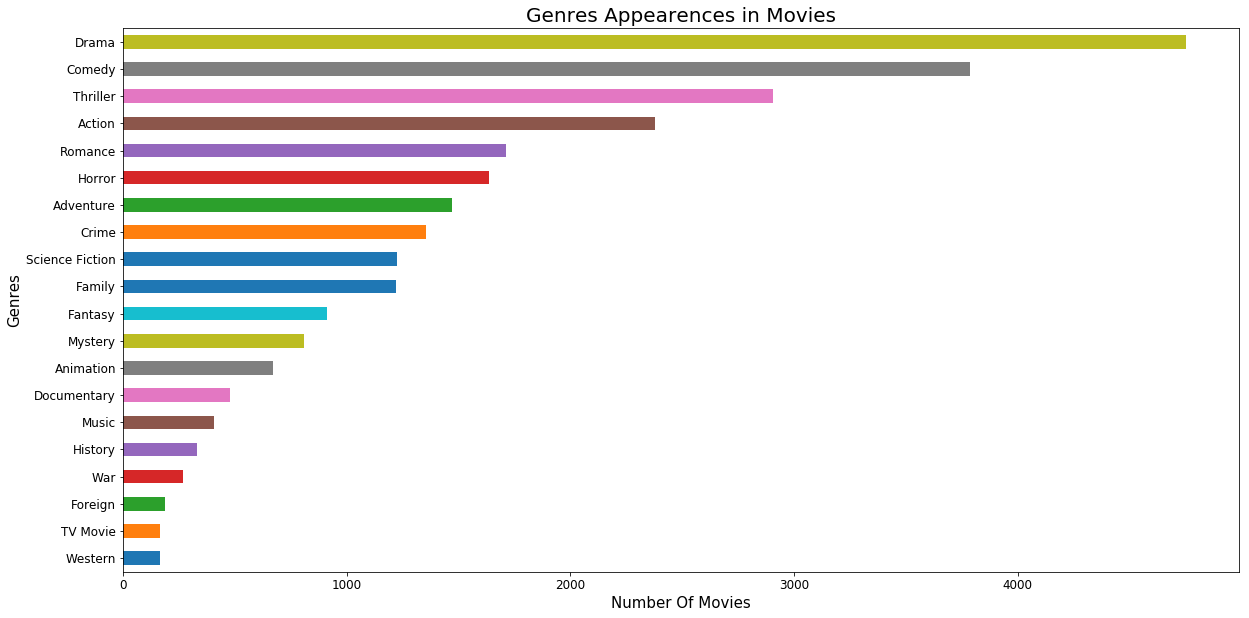

In [17]:
res.plot(kind= 'barh',figsize = (20,10), fontsize=12)
#setup the title of the plot.
plt.title("Genres Appearences in Movies", fontsize=20 )
#setup the x and y labels of the plot.
plt.xlabel('Number Of Movies',fontsize=15)
plt.ylabel('Genres',fontsize= 15)

The drama genre has the biggest number of releases, followed by comedies and thrillers, based on the plot.

### Research Question 2  (Which star cast appears most in movies and does its existance influence revenue?)

I will use the same function with the cast(both the cast and genre are separated with|)

In [18]:
res2 = collect_data('cast')

I will take just the ones over 50 which are 6

In [19]:
res3 = res2[lambda x: x>50]

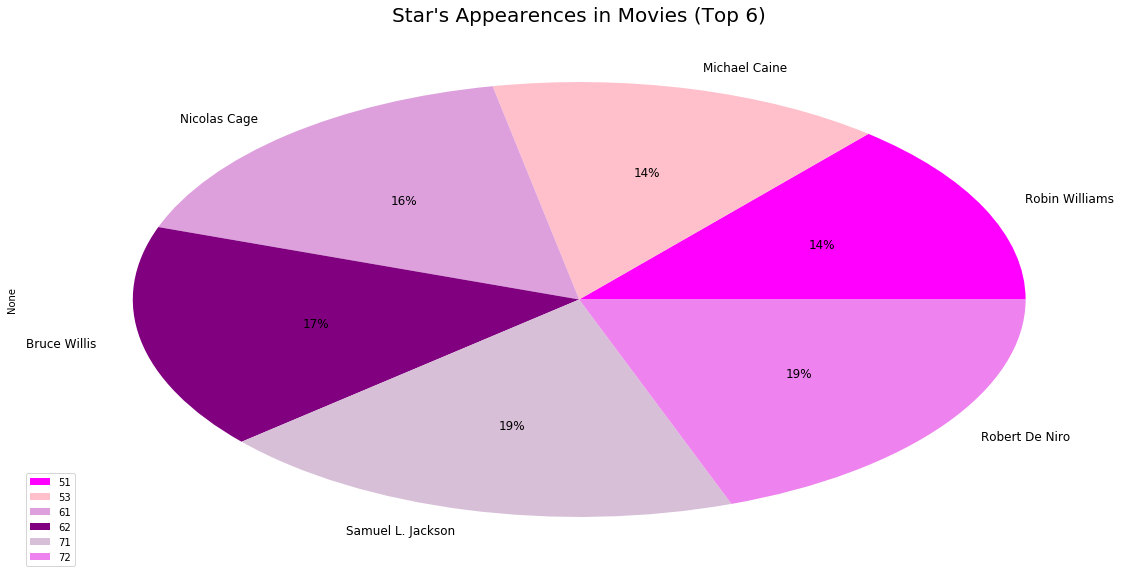

In [20]:
res3.plot(kind= 'pie',autopct='%1.0f%%', colors=['fuchsia', 'pink', 'plum','purple','thistle','violet'],figsize = (20,10), fontsize=12)
#setup the title of the plot.
plt.title("Star's Appearences in Movies (Top 6)", fontsize=20 )
plt.legend(res3,loc=3)

Based on this chart Robert De Niro and  Samuel L.Jackson appears the most in the movies of this dataset but does their appearence influence the profit?

This function will add 1 to the column each time one of the TOP6 starts appears in the cast.

In [21]:
res_list=[]
actors = ['Robin Williams', 'Michael Caine', 'Nicolas Cage', 'Bruce Willis', 'Samuel L. Jackson', 'Robert De Niro' ]
for index, value in df['cast'].items():
    split_data = value.split('|')
    for  value1 in split_data:
        if value1 in actors:
            res_list.append(1)
        else:
            res_list.append(0)
        break


In [22]:
df['top6_Star']=res_list

Let's have a look at the revenue based on the existance of the top6 stars.

In [23]:
df.groupby('top6_Star')['revenue'].mean()

top6_Star
0    3.946984e+07
1    7.144914e+07
Name: revenue, dtype: float64

Those results showcase that the starts existance do influence the profits of the movie.

### Research Question 3 (What kinds of factors are connected to movies that bring in huge profits?)

Let's add a column profits to our dataset

In [24]:
df['profits'] =  df['revenue'] - df['budget']

In [25]:
df.groupby('top6_Star')['profits'].mean()

top6_Star
0    2.510125e+07
1    3.910061e+07
Name: profits, dtype: float64

We'll simply use the corrolation matrix.

In [26]:
corr = df.corr()

In [27]:
corr.style.background_gradient(cmap='coolwarm')

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,top6_Star,profits
popularity,1,0.544787,0.663084,0.137416,0.800731,0.214584,0.0916414,0.0398255,0.628846
budget,0.544787,1,0.734682,0.190305,0.632371,0.0848711,0.11758,0.0808763,0.569948
revenue,0.663084,0.734682,1,0.162476,0.791022,0.176121,0.0581277,0.0379917,0.976168
runtime,0.137416,0.190305,0.162476,1,0.163139,0.170453,-0.120235,0.0337502,0.135912
vote_count,0.800731,0.632371,0.791022,0.163139,1,0.257756,0.109224,0.0340827,0.755785
vote_average,0.214584,0.0848711,0.176121,0.170453,0.257756,1,-0.122755,0.00664407,0.186166
release_year,0.0916414,0.11758,0.0581277,-0.120235,0.109224,-0.122755,1,-0.0176328,0.032791
top6_Star,0.0398255,0.0808763,0.0379917,0.0337502,0.0340827,0.00664407,-0.0176328,1,0.0201437
profits,0.628846,0.569948,0.976168,0.135912,0.755785,0.186166,0.032791,0.0201437,1


### Research Question 4 (What period is the best to release a film?)

First, I will extract the month from the release date column

In [28]:
df['month'] = df['release_date'].apply(lambda x: x.month)

This is just to add the column period based on months

In [29]:
period_l =[]
for f in df['month']:
    if f == 1 or f == 2 or f ==12:
        period_l.append('Winter')
    elif f == 3 or f == 4 or f == 5:
        period_l.append('Spring')
    elif f == 6 or f == 7 or f == 8:
        period_l.append('Summer')
    else:
        period_l.append('Fall')

In [30]:
df['period'] = period_l

Plotting the distribution of profits in each period.

In [31]:
period =df.groupby('period')['profits'].sum()

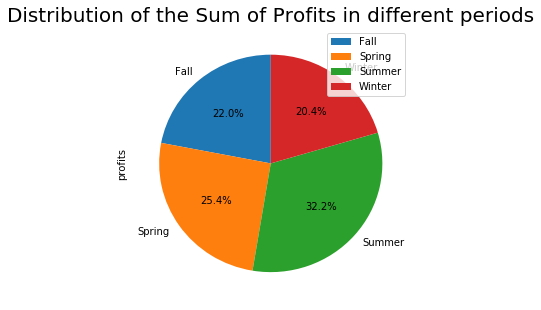

In [32]:
plt.title("Distribution of the Sum of Profits in different periods", fontsize=20 )
period.plot.pie(figsize=(5, 5),autopct='%1.1f%%',  legend=True, startangle=90)
#plt.legend(['Fall', 'Spring', 'Summer', 'Winter'],loc=2)
plt.show()


The summer wins when it comes to the sum of profits, will it stay the same if we use max and min?

Text(0,0.5,'Profits')

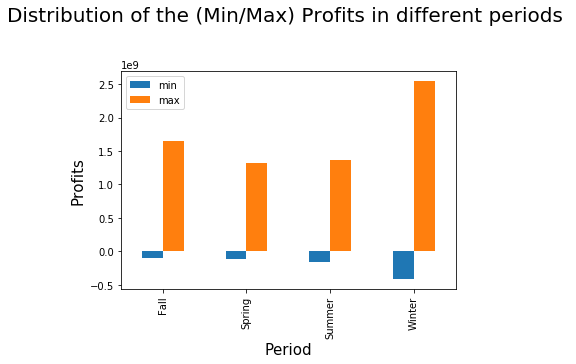

In [33]:
df.groupby('period')['profits'].agg(["min",'max']).plot(kind="bar")
plt.title("Distribution of the (Min/Max) Profits in different periods \n\n", fontsize=20 )
plt.xlabel('Period',fontsize=15)
plt.ylabel('Profits',fontsize= 15)

Certainly not, the maximum of profits is in Winter surprisingly.

### Research Question 5 (Does budget have impact on revenue?)

Simply plotting the revenue in functiion of the plot

Text(0,0.5,'Revenue')

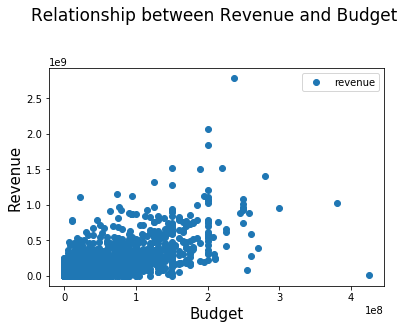

In [34]:
df.plot(x="budget", y="revenue",  style="o")
plt.title("Relationship between Revenue and Budget \n\n", fontsize=17 )
plt.xlabel('Budget',fontsize=15)
plt.ylabel('Revenue',fontsize= 15)

It's clear that there is an obvious relationship between budget and revenue.

<a id='conclusions'></a>
## Conclusions
Dealing with movie datasets means that the target is not just companies but also the audience, who often ask questions and seek multiple information about movies, cast, ...

I asked useful questions throughout my data analysis and have come to the following conclusions:

   1-Drama is a popular genre when it comes to movie creation, so if you're an audience member and you enjoy this subgenre, you're in luck. Additionally, if your business is a production one, watch out for rivals. On the other hand, at the bottom we found the western genre. The reason behind that is that its viewership is decreasing. Similarly, the war and history genres suffer because of the high cost of production.

   2-Robert De Niro is a big star, no doubt, and its existence with the ones in the top6 list will influence your revenue.

   3-A number of elements, such as the budget, the runtime, and the audience, can influence the revenue.

   4- In general, the best period to release a movie is summer, although the maximum was in winter, so as a production company, the safest choice is summer.

   5-Budget has an impact on revenue; the more you invest, the more you earn; however, you may get lucky and win a lot with a small budget.

When it comes to limitations, this data contains so many categorical data which are combined, so the deal is a little bit harder. In addition, there is a lot of missing data.

## Submitting your Project 



In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset1.ipynb'])

255